**Regressão Linear Multipla**

In [17]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Lendo o arquivo CSV
df = pd.read_csv('Dados regressão linear multipla - Sheet1.csv')

In [3]:
df.head()

,youtube,facebook,jornal,vendas
0,"276,12","45,36","83,04","26,52"
1,"53,4","47,16","54,12","12,48"
2,"20,64","55,08","83,16","11,16"
3,"181,8","49,56","70,2","22,2"
4,"216,96","12,96","70,08","15,48"


In [15]:
# Criando um DataFrame corretamente
df = df.rename(columns={'youtube': 'x1', 'facebook': 'x2', 'jornal': 'x3', 'vendas': 'y'})

# Definindo as variáveis independentes e dependentes
X = df[['x1', 'x2', 'x3']]  # Variáveis independentes
y = df['y']  # Variável dependente

# Adicionando uma constante (intercepto) ao modelo
X = sm.add_constant(X)

# Ajustando o modelo de regressão linear múltipla
model = sm.OLS(y, X).fit()

# Visualizando o resumo completo dos resultados
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           1.58e-96
Time:                        22:24:59   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5267      0.374      9.422      0.0

In [18]:
# Separando os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adicionando uma constante (intercepto) ao modelo
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Ajustando o modelo de regressão linear múltipla
model2 = sm.OLS(y_train, X_train).fit()

# Visualizando o resumo completo dos resultados
print(model2.summary())

# Realizando previsões com o conjunto de teste
y_pred = model2.predict(X_test)

# Calculando o Erro Quadrático Médio (MSE) e o R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibindo as métricas
print(f'\n')
print(f'Métricas da modelagem:')
print(f'MSE (Erro Quadrático Médio): {mse}')
print(f'R² (Coeficiente de Determinação): {r2}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     446.6
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           2.53e-76
Time:                        22:25:59   Log-Likelihood:                -335.81
No. Observations:                 160   AIC:                             679.6
Df Residuals:                     156   BIC:                             691.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5749      0.424      8.427      0.0

Visualizando gráficamente (várivel dependente)

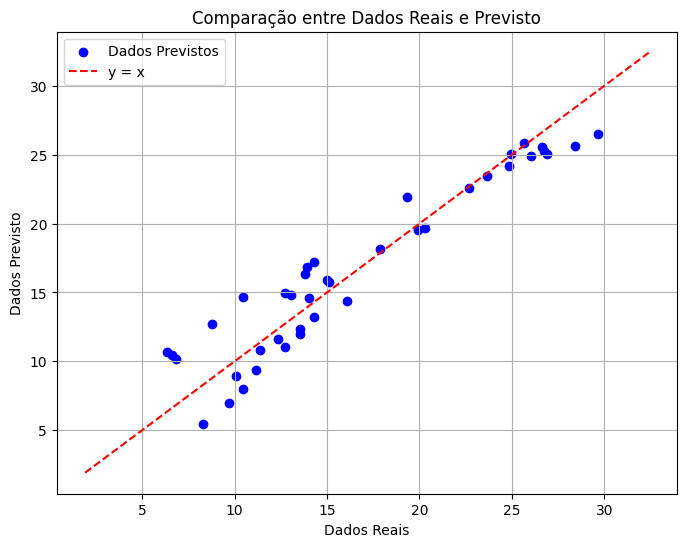

In [19]:
# Visualizando a diferença entre dados reais e previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Dados Previstos')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='y = x')
plt.title('Comparação entre Dados Reais e Previsto')
plt.xlabel('Dados Reais')
plt.ylabel('Dados Previsto')
plt.legend()
plt.grid()
plt.show()

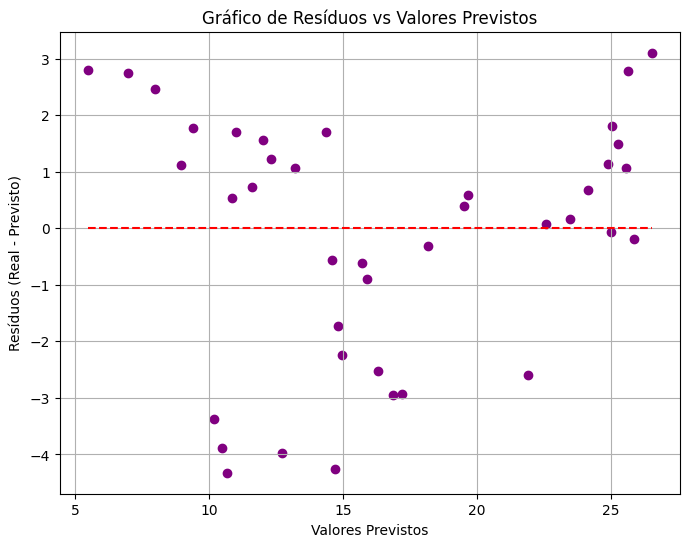

In [20]:
# Resíduos (diferença entre real e previsto)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.hlines(0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.title('Gráfico de Resíduos vs Valores Previstos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos (Real - Previsto)')
plt.grid()
plt.show()


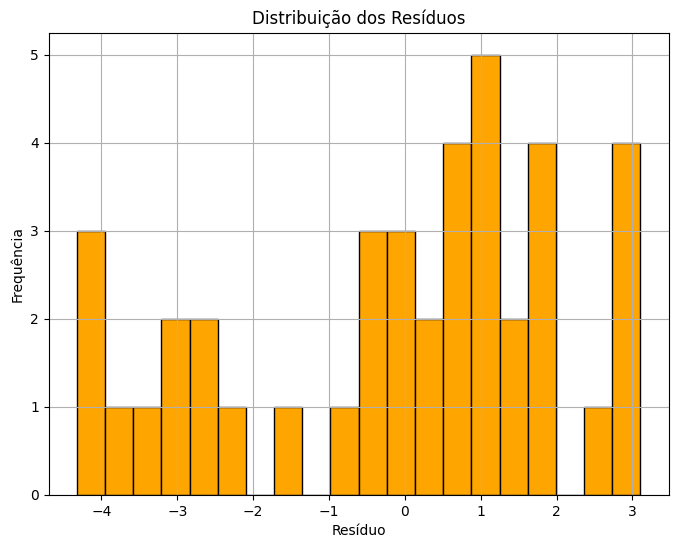

In [21]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='orange', edgecolor='k')
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.grid()
plt.show()


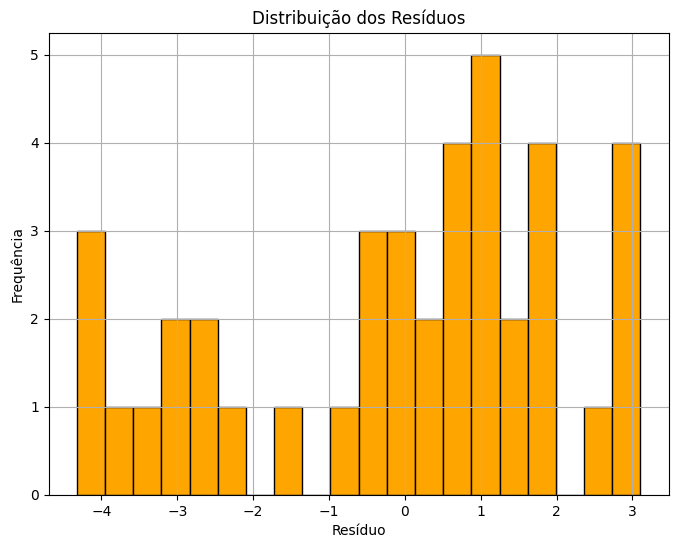

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='orange', edgecolor='k')
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.grid()
plt.show()

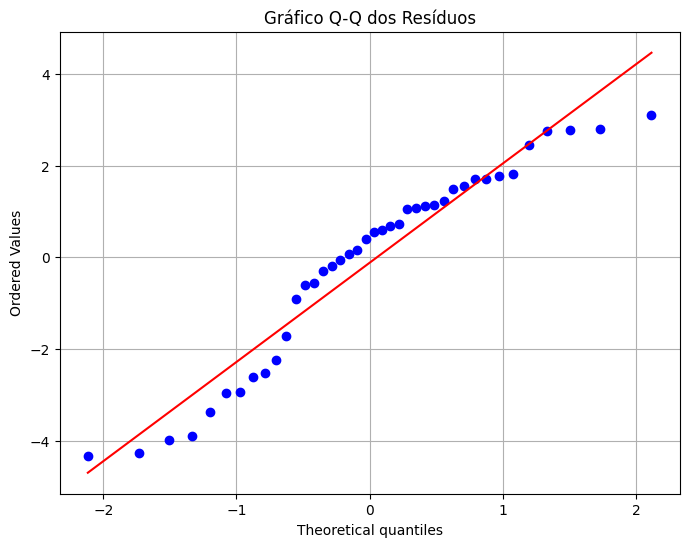

In [23]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Gráfico Q-Q dos Resíduos')
plt.grid()
plt.show()


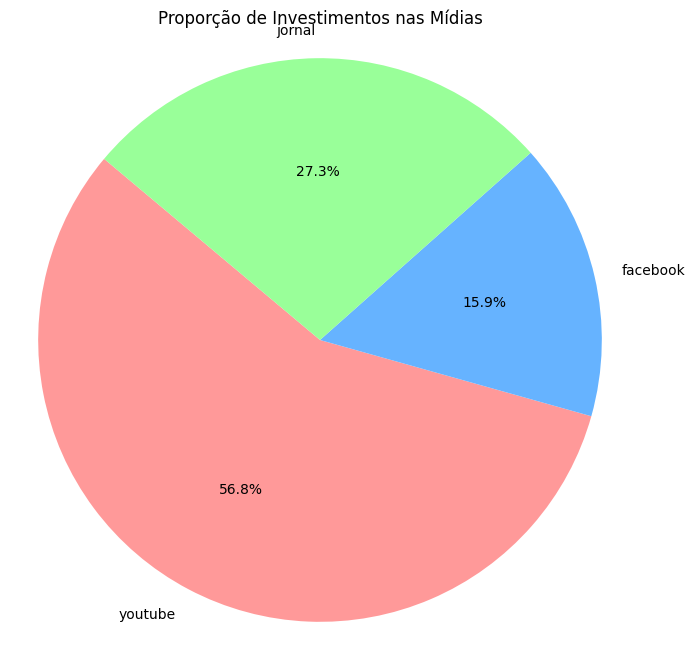

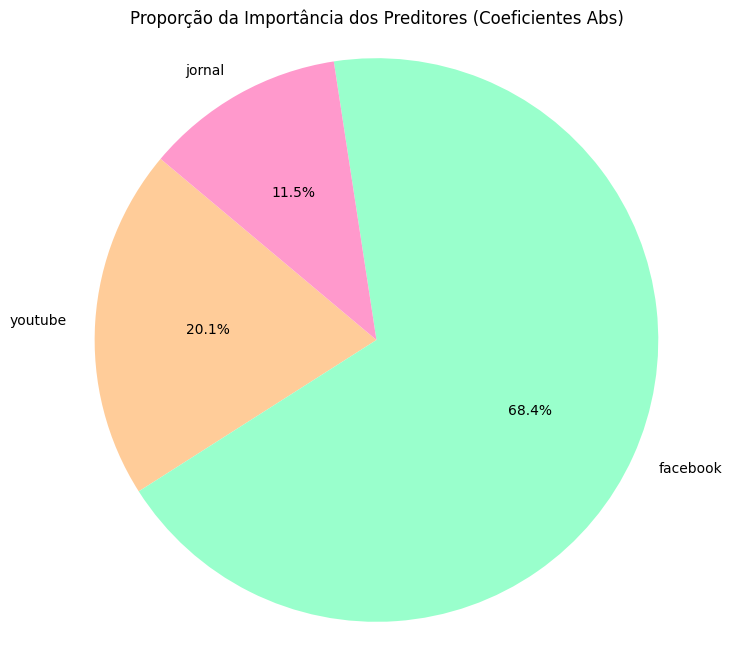

In [ ]:
## Proporção da soma de investimentos nas mídias
soma_investimentos = df[['youtube', 'facebook', 'jornal']].sum()

plt.figure(figsize=(8,8))
plt.pie(soma_investimentos, labels=soma_investimentos.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Proporção de Investimentos nas Mídias')
plt.axis('equal')
plt.show()

# 2. Ajuste modelo para pegar coeficientes
X = df[['youtube', 'facebook', 'jornal']]
y = df['vendas']
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Pegando os coeficientes absolutos das variáveis (sem o intercepto)
coefs = model.params.drop('const').abs()

plt.figure(figsize=(8,8))
plt.pie(coefs, labels=coefs.index, autopct='%1.1f%%', startangle=140, colors=['#ffcc99','#99ffcc','#ff99cc'])
plt.title('Proporção da Importância dos Preditores (Coeficientes Abs)')
plt.axis('equal')
plt.show()